# 1. Problem statement

Global warming may be the chief and most complicated environmental problem to potentially affect our planet. The climate has been warming fast since the Industrial Revolution, because human activities are altering the composition of our atmosphere.

The Berkeley Earth Surface Temperature Study, conducted by Berkeley Earth in collaboration with Lawrence Berkeley National Laboratory, consolidates a vast array of climate data. It encompasses 1.6 billion temperature records sourced from 16 archives, facilitating comprehensive analysis of climate trends. The study emphasizes accessibility and transparency by enabling detailed examination such as country-specific subsets, and ensures data integrity through openly publishing both original data and any modifications made. Methodological inclusivity allows for the incorporation of weather observations from shorter time series, reducing data loss and enriching understanding of climate trends. This exploratory data analysis (EDA) aims to visualize global warming and Earth's temperature trends.

# 2. Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import time
import nltk
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import LinearSVC
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import scipy
from scipy.stats import spearmanr
import statistics
from datetime import timedelta
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.simplefilter("ignore")

# 3. Loading data

In [2]:
Global_Temperature = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')
Temperature_Country = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv')
Temperature_City = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv')


In [3]:
df = Temperature_City

In [4]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [6]:
Global_Temperature.sample(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1895,1907-12-01,2.956,0.251,8.831,0.270,-2.585,0.288,13.225,0.121
1694,1891-03-01,4.755,0.331,10.629,0.440,-1.449,0.593,14.191,0.153
2815,1984-08-01,13.984,0.085,19.830,0.235,8.330,0.151,16.972,0.054
2468,1955-09-01,11.954,0.162,17.859,0.150,6.405,0.179,16.148,0.089
2087,1923-12-01,3.880,0.216,9.269,0.278,-1.903,0.310,13.739,0.119


In [7]:
Temperature_Country.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
513010,1903-06-01,25.932,0.492,Syria
152736,1999-10-01,21.602,0.131,Ecuador
169609,1860-07-01,2.936,1.688,Falkland Islands (Islas Malvinas)
155623,1859-11-01,22.689,1.846,El Salvador
36349,1980-04-01,22.833,0.173,Australia


In [8]:
Temperature_City.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
7982515,1995-12-01,20.240,0.260,Vejalpur,India,23.31N,74.27E
366523,1851-11-01,24.478,1.354,Araçatuba,Brazil,21.70S,51.06W
6427848,1954-12-01,5.114,0.220,Rotterdam,Netherlands,52.24N,5.26E
749261,1952-04-01,13.775,0.254,Batman,Turkey,37.78N,40.68E
225619,1837-02-01,11.310,2.153,Amadora,Portugal,39.38N,8.32W


In [9]:
Temperature_City = Temperature_City[~Temperature_City['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]
# remove the duplicate countries and countries for which there is no information about temperature

In [10]:
Temperature_City = Temperature_City.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

In [11]:
countries = np.unique(Temperature_City['Country'])
avg_temp = []
for country in countries:
    avg_temp.append(Temperature_City[Temperature_City['Country'] == 
                                               country]['AverageTemperature'].mean())

In [12]:
countries = np.unique(Temperature_City['Country'])
avg_temp = []
for country in countries:
    avg_temp.append(Temperature_City[Temperature_City['Country'] == 
                                               country]['AverageTemperature'].mean())

In [13]:
data = [dict(
        type='choropleth',
        locations=country,
        z=avg_temp,
        locationmode='country names',
        text=countries,
        marker=dict(
            line=dict(color='blue', width=1)),
        colorbar=dict(autotick=True, tickprefix='', 
            title='# Average\nTemperature,\n°C')
        )
]

In [14]:
# Extract unique years from the 'dt' column
unique_years = np.unique(Temperature_City['dt'].apply(lambda x: x[:4]))

# Initialize a list to store mean temperatures every 10 years for each country
avg_temp_per_decade = [[] for _ in range(len(unique_years[::10]))]

# Iterate over each country
for idx, country in enumerate(countries):
    # Select temperature data for the current country
    country_data = Temperature_City[Temperature_City['Country'] == country]
    # Iterate over years every 10 years
    for i, year in enumerate(unique_years[::10]):
        # Calculate mean temperature for the current country and year
        avg_temp = country_data[country_data['dt'].apply(lambda x: x[:4]) == year]['AverageTemperature'].mean()
        avg_temp_per_decade[i].append(avg_temp)

# 4. Data visualization

## 4.1 Filtering and Preprocessing Ukraine's Temperature Data

In [15]:
# Extract unique years from the 'dt' column
unique_years = np.unique(Temperature_City['dt'].apply(lambda x: x[:4]))

# Initialize a list to store mean temperatures every 10 years for each country
avg_temp_per_decade = [[] for _ in range(len(unique_years[::10]))]

# Iterate over each country
for idx, country in enumerate(countries):
    # Select temperature data for the current country
    country_data = Temperature_City[Temperature_City['Country'] == country]
    # Iterate over years every 10 years
    for i, year in enumerate(unique_years[::10]):
        # Calculate mean temperature for the current country and year
        avg_temp = country_data[country_data['dt'].apply(lambda x: x[:4]) == year]['AverageTemperature'].mean()
        avg_temp_per_decade[i].append(avg_temp)

In [16]:
df = Temperature_City[Temperature_City['Country']=='Ukraine']

#dropping rows with NaN values
df.dropna(inplace=True)

# first lets bifurcate the months and year data for the dt
df.loc[:,'dt'] = pd.to_datetime(df['dt'])

df.loc[:,'month'] = [x.month for x in list(df['dt'])]

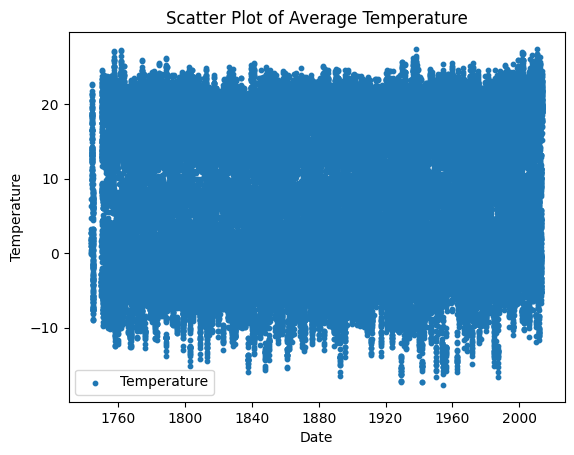

In [17]:
plt.scatter(df['dt'], df['AverageTemperature'], marker='o', s=10, label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Scatter Plot of Average Temperature')
plt.legend()
plt.show()

According to the obtained scatter plot, the average temperature in Ukraine has remained relatively stable over the observed period. However, in the last decade, both maximum and minimum temperatures have risen, indicating an increase in temperature extremes. This suggests that while the overall climate remains stable, the range of temperature fluctuations is widening.

## 4.2 Analysis of Historical Temperature Extremes in Ukraine

In [18]:
ukraine_data = Temperature_City[Temperature_City['Country'] == 'Ukraine']
max_temp_row_ukraine = ukraine_data[ukraine_data['AverageTemperature'] == ukraine_data['AverageTemperature'].max()]
print("City in Ukraine with maximum average temperature:")
print(max_temp_row_ukraine)

City in Ukraine with maximum average temperature:
                 dt  AverageTemperature  AverageTemperatureUncertainty  \
4550916  1938-07-01              27.413                           0.54   

              City  Country Latitude Longitude  
4550916  Makiyivka  Ukraine   47.42N    39.08E  


In [19]:
ukraine_data = Temperature_City[Temperature_City['Country'] == 'Ukraine']
min_temp_row_ukraine = ukraine_data[ukraine_data['AverageTemperature'] == ukraine_data['AverageTemperature'].min()]
print("City in Ukraine with minimum average temperature:")
print(min_temp_row_ukraine)

City in Ukraine with minimum average temperature:
                 dt  AverageTemperature  AverageTemperatureUncertainty  \
3000405  1954-02-01             -17.686                          1.753   

             City  Country Latitude Longitude  
3000405  Horlivka  Ukraine   49.03N    39.18E  


The lowest temperature ever recorded in Ukraine occurred on February 1, 1954, in Horlivka, measuring -17.686°C. Conversely, the highest temperature was observed in Makiyivka on July 1, 1938, reaching +27.413°C. These observations reflect conditions typical of the steppe zone in Ukraine's Donbas region.

## 4.3 Analyze critical temperature indicators in Ukraine in 2012 and compare them with those of the capital city

In [20]:
# Convert 'dt' column to datetime format
Temperature_City['dt'] = pd.to_datetime(Temperature_City['dt'])

# Select data for Ukraine for the year 2012
df_ukraine_2012 = Temperature_City[(Temperature_City['Country'] == 'Ukraine') & (Temperature_City['dt'].dt.year == 2012)]
df_ukraine_2012.dropna(inplace=True)

# Find the city with the highest temperature in 2012
city_with_max_temp = df_ukraine_2012.loc[df_ukraine_2012['AverageTemperature'].idxmax(), 'City']
max_temp = df_ukraine_2012['AverageTemperature'].max()

# Find the city with the lowest temperature in 2012
city_with_min_temp = df_ukraine_2012.loc[df_ukraine_2012['AverageTemperature'].idxmin(), 'City']
min_temp = df_ukraine_2012['AverageTemperature'].min()

# Print results
print(f"City with the highest temperature in Ukraine in 2012: {city_with_max_temp}, {max_temp} degrees Celsius")
print(f"City with the lowest temperature in Ukraine in 2012: {city_with_min_temp}, {min_temp} degrees Celsius")

City with the highest temperature in Ukraine in 2012: Yevpatoriya, 26.322000000000006 degrees Celsius
City with the lowest temperature in Ukraine in 2012: Chernihiv, -11.653 degrees Celsius


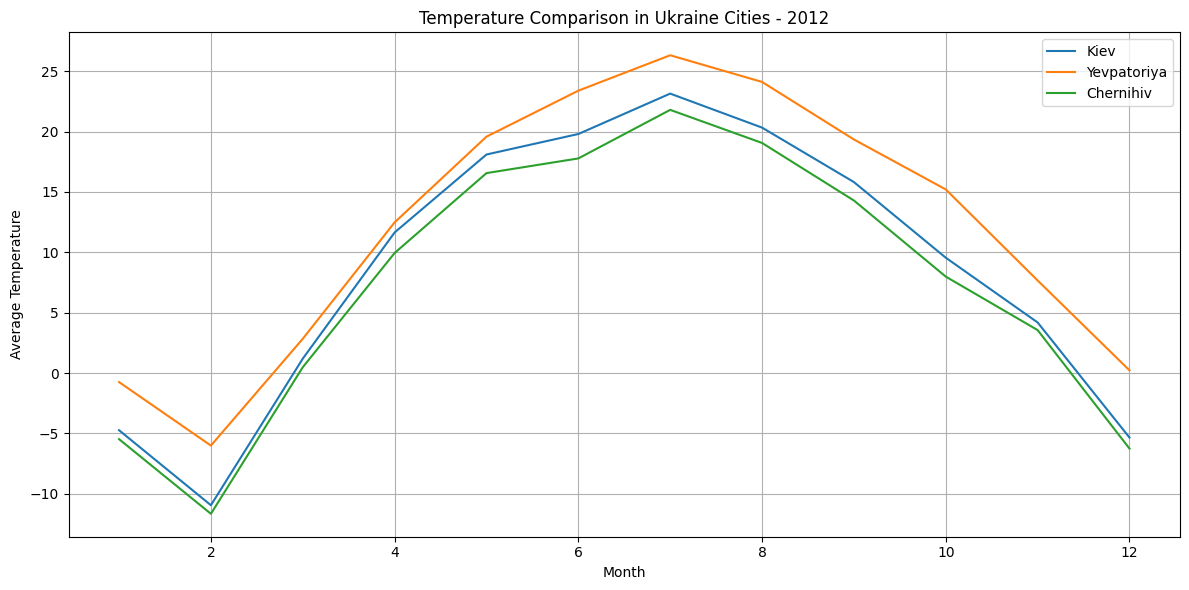

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'dt' column to datetime object
Temperature_City['dt'] = pd.to_datetime(Temperature_City['dt'])

# Selecting data for Kiev for the year 2012
df_kiev = Temperature_City[(Temperature_City['Country'] == 'Ukraine') & 
                           (Temperature_City['City'] == 'Kiev') & 
                           (Temperature_City['dt'].dt.year == 2012)]
df_kiev.dropna(inplace=True)  # Drop rows with NaN values
df_kiev.sort_values(by='dt', inplace=True)  # Sorting by date

# Selecting data for Yevpatoriya for the year 2012
df_yevpatoriya = Temperature_City[(Temperature_City['Country'] == 'Ukraine') & 
                                  (Temperature_City['City'] == 'Yevpatoriya') & 
                                  (Temperature_City['dt'].dt.year == 2012)]
df_yevpatoriya.dropna(inplace=True)  # Drop rows with NaN values
df_yevpatoriya.sort_values(by='dt', inplace=True)  # Sorting by date

# Selecting data for Chernihiv for the year 2012
df_chernihiv = Temperature_City[(Temperature_City['Country'] == 'Ukraine') & 
                                (Temperature_City['City'] == 'Chernihiv') & 
                                (Temperature_City['dt'].dt.year == 2012)]
df_chernihiv.dropna(inplace=True)  # Drop rows with NaN values
df_chernihiv.sort_values(by='dt', inplace=True)  # Sorting by date

# Creating the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot for Kiev
plt.plot(df_kiev['dt'].dt.month, df_kiev['AverageTemperature'], label='Kiev')

# Plot for Yevpatoriya
plt.plot(df_yevpatoriya['dt'].dt.month, df_yevpatoriya['AverageTemperature'], label='Yevpatoriya')

# Plot for Chernihiv
plt.plot(df_chernihiv['dt'].dt.month, df_chernihiv['AverageTemperature'], label='Chernihiv')

# Setting axes and title
plt.title('Temperature Comparison in Ukraine Cities - 2012')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.grid(True)

# Adding legend
plt.legend()

# Adjust layout to prevent overlapping elements
plt.tight_layout()
plt.show()


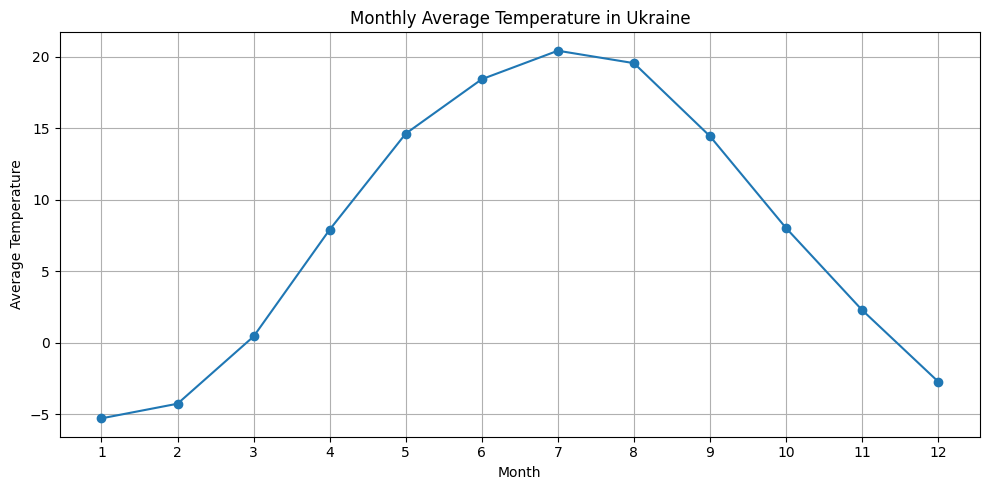

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Suppose df is your DataFrame containing temperature data

# Adding a 'month' column if it doesn't already exist
df['month'] = pd.to_datetime(df['dt']).dt.month

# Creating a figure and axis object for plotting
fig, ax = plt.subplots(figsize=(10, 5))

# Selecting data for Ukraine only
df_ukraine = df[df['Country'] == 'Ukraine']

# Calculating the monthly average temperature
monthly_avg_temp = df_ukraine.groupby('month')['AverageTemperature'].mean()

# Plotting the monthly average temperature
ax.plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o', linestyle='-')

# Setting plot title and labels for axes
ax.set_title('Monthly Average Temperature in Ukraine')
ax.set_xlabel('Month')
ax.set_ylabel('Average Temperature')
ax.grid(True)  # Enabling grid

# Setting x-axis ticks for all months (from 1 to 12)
plt.xticks(range(1, 13))

# Adjusting layout to prevent overlapping elements
plt.tight_layout()

# Displaying the plot
plt.show()


Based on the data obtained, it can be concluded that the average temperatures observed in Kiev and across Ukraine do not significantly differ from those recorded in cities where critical temperature indicators were noted. This suggests a relatively uniform temperature distribution across the entire territory of Ukraine.

## 4.2 The global temperature level

In [23]:
import pandas as pd

# Selecting relevant columns from Global_Temperature DataFrame
Global_Temperature = Global_Temperature[['dt', 'LandAverageTemperature']]

# Converting 'dt' column to datetime format
Global_Temperature['dt'] = pd.to_datetime(Global_Temperature['dt'])

# Adding 'year' and 'month' columns extracted from 'dt'
Global_Temperature['year'] = Global_Temperature['dt'].dt.year
Global_Temperature['month'] = Global_Temperature['dt'].dt.month

# Function to determine the season based on the month
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

# Determining the minimum and maximum years for filtering
min_year = Global_Temperature['year'].min()
max_year = Global_Temperature['year'].max()
years = range(min_year, max_year + 1)

# Creating lists to store average temperatures for each season
spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

# Calculating average temperatures for each season and each year
for year in years:
    curr_years_data = Global_Temperature[Global_Temperature['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['month'].apply(get_season) == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['month'].apply(get_season) == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['month'].apply(get_season) == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['month'].apply(get_season) == 'winter']['LandAverageTemperature'].mean())


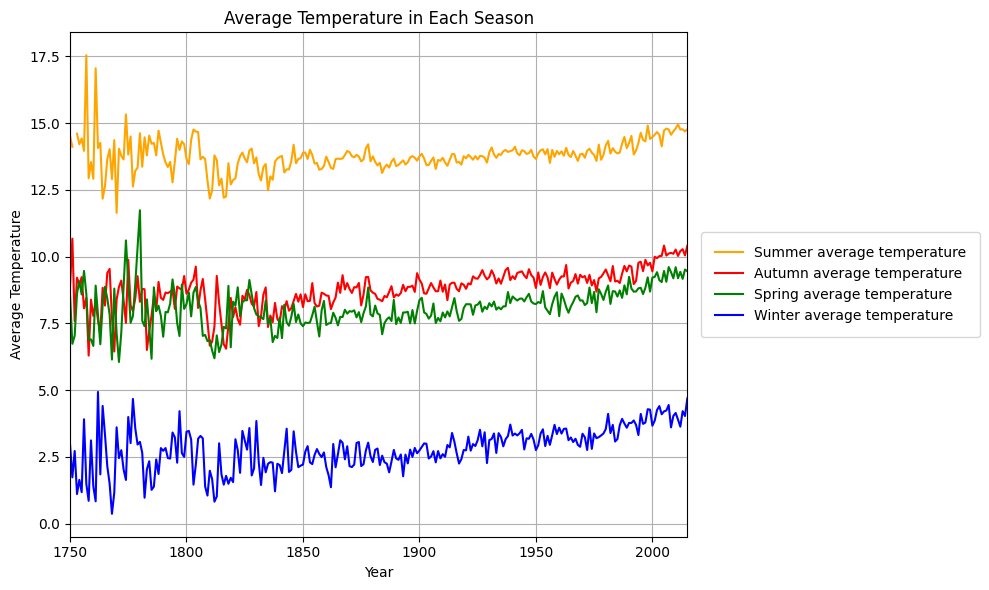

In [24]:
import matplotlib.pyplot as plt

# Define colors for each season
colors = ['orange', 'red', 'green', 'blue']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting each season with a loop
seasons = ['Summer', 'Autumn', 'Spring', 'Winter']
for i, season in enumerate(seasons):
    plt.plot(years, eval(f"{season.lower()}_temps"), label=f'{season} average temperature', color=colors[i])

# Setting plot details
plt.xlim(min_year, max_year)
ax.set_ylabel('Average Temperature')
ax.set_xlabel('Year')
ax.set_title('Average Temperature in Each Season')

# Adding grid and legend
plt.grid(True)
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

# Showing the plot
plt.tight_layout()
plt.show()


In [25]:
# Example data (replace with your actual data)
years = np.arange(1900, 2013)
mean_temp_world = np.random.uniform(8, 15, len(years))
mean_temp_world_uncertainty = np.random.uniform(0.5, 1.5, len(years))

trace0 = go.Scatter(
    x=years,
    y=mean_temp_world + mean_temp_world_uncertainty,
    fill=None,
    mode='lines',
    name='Uncertainty (upper bound)',
    line=dict(
        color='rgb(255, 99, 71)',  # Tomato color
        width=2,
    )
)

trace1 = go.Scatter(
    x=years,
    y=mean_temp_world - mean_temp_world_uncertainty,
    fill='tonexty',
    mode='lines',
    name='Uncertainty (lower bound)',
    line=dict(
        color='rgb(255, 99, 71)',  # Tomato color
        width=2,
    )
)

trace2 = go.Scatter(
    x=years,
    y=mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(30, 144, 255)',  # Dodger Blue color
        width=2,
    )
)

data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature trends',
    showlegend=True,
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

The analysis indicates that following the onset of the Industrial Revolution, average temperatures have shown minimal change. This finding challenges the theory of global warming as a consequence of anthropogenic activities.

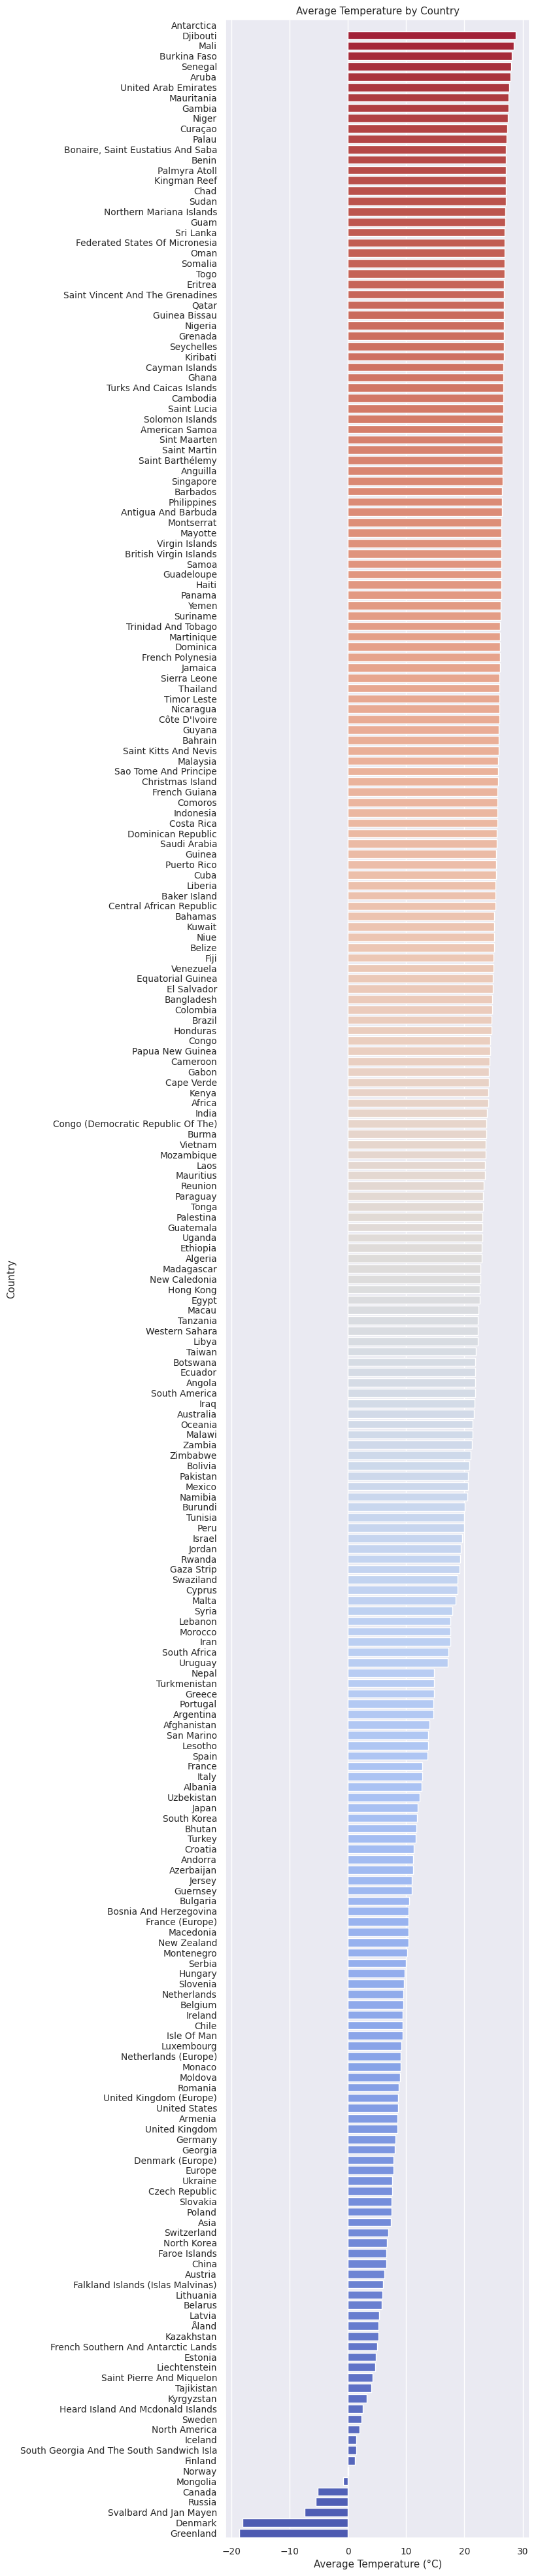

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read global temperature data
Global_Temperature = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')

# Read temperature data by country
Temperature_Country = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv')

# Read temperature data by city
Temperature_City = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv')

# Select unique countries from your dataset
countries = Temperature_Country['Country'].unique()

# Create a list of average temperatures for each country
avg_temp = []
for country in countries:
    avg_temp.append(Temperature_Country[Temperature_Country['Country'] == country]['AverageTemperature'].mean())

# Sort countries by average temperature in descending order
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(avg_temp, countries), reverse=True)))
data = pd.DataFrame({'Average temperature': mean_temp_bar, 'Country': countries_bar})

# Plot settings
sns.set(font_scale=0.9)  # Reduce font size
f, ax = plt.subplots(figsize=(6, 50))  # Adjust plot size
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(data=data, x='Average temperature', y='Country', palette=colors_cw[::-1])

# Customize axes and title
ax.set(xlabel='Average Temperature (°C)', title='Average Temperature by Country')

plt.show()



## 5. Conclusion

Based on the analyzed data, the following conclusions can be drawn:

1. The lowest temperature ever recorded in Ukraine occurred on February 1, 1954, in Horlivka, measuring -17.686°C. Conversely, the highest temperature was observed in Makiyivka on July 1, 1938, reaching +27.413°C. These observations reflect conditions typical of the steppe zone in Ukraine's Donbas region.

2. The analysis of temperature data indicates that average temperatures observed in Kiev and throughout Ukraine show no significant deviation from those recorded in cities where critical temperature indicators were observed. This suggests a relatively homogeneous distribution of temperatures across Ukraine's territory.

3. The analysis reveals that average temperatures have exhibited minimal changes following the onset of the Industrial Revolution. This finding challenges the hypothesis of global warming being primarily driven by anthropogenic activities.

## 6. Discussion

During the analysis, no correlation was observed between the development of industries after the Industrial Revolution and changes in temperature, which allows us to reject the theory that temperature increases are directly caused by anthropogenic activities. In the future, there are plans to investigate correlations between temperature changes and global population growth to substantiate the theory that climate changes occur due to increases in Earth's population.

